### Import modules

In [1]:
# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

리뷰는 두 개 이상의 단어로 이루어져있는데 이건 어떻게 처리하는가?

10000개의 단어는 사전에 정의해야함.

(none * 10000) (10000 * 128) (128 * 1) (none * 1)

none에 들어가는 숫자만큼 동시에 처리. 

그러나 결과는 하나로 나와야하므로 collapse 시킬 필요 있음. 만약 none에 100을 넣었다고 생각할 때, 중간의 100 * 128을 1 * 128 벡터가 100개 있다고 생각. 100개의 벡터를 하나로 평균화 시키는 명령을 사용하면 결과를 하나로 도출할 수 있음!

### load data 
- #### dataset (x: imdb article -> y: text type)
- #### word2idx dict (key: word; value: index)

input에 들어갈 node의 개수 결정

word2idx는 사전. 

In [2]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.imdb.load_data(num_words=vocab_size)
word2idx = tensorflow.keras.datasets.imdb.get_word_index()

### modifiy word2idx dict (to reflect x_train, x_text)

x_train에 10000보다 큰 숫자는 없음!

In [3]:
word2idx
# 단어들마다 idx가 붙어있음. 

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [4]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
x_train.shape
# 25000개의 데이터 사용

(25000,)

In [7]:
y_train[0]
# 0 = 싫어요, 1 = 좋아요

1

In [8]:
len(word2idx)

88584

#### key, value가 받아와지면서 for loop는 88584번 도는 것.
#### for loop를 통해 dict 형태로 만들어줌.
#### for loop를 통해 모든 value에 3만큼 더해줌. 이는 PAD, START, UNK, UNUSED를 포함시키기 위함. 

In [9]:
word2idx = {k:v+3 for k, v in word2idx.items()}
word2idx['<PAD>'] = 0
word2idx['<START>'] = 1
word2idx['<UNK>'] = 2
word2idx['<UNUSED>'] = 3

### create idx2word: inverse of word2idx
    inverse 사전도 만들어줘야함.
    이는 숫자 정보를 보고 단어를 알기 위함.

In [10]:
idx2word = {v:k for k, v in word2idx.items()}

In [11]:
len(x_train[0])

218

### padding x_train, x_test
    len(x_train)이 256이 아닐 경우 padding 과정을 거쳐 256으로 맞춰줘야함.
    padding = 'post' : 뒷 부분에 PAD를 표시해라

In [12]:
x_train = pad_sequences(x_train, value=word2idx['<PAD>'], padding='post', maxlen=256)
x_test = pad_sequences(x_test, value=word2idx['<PAD>'], padding='post', maxlen=256)

In [13]:
x_train[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

### create model
   위의 x_train의 숫자 하나하나를 one hot coding 할 수 있음. 
   embedding은 256을 256 * 10000인 2차원으로 바꿔주고 128개의 hidden node를 만들어줌.
   1의 개수는 256개, 0의 개수는 255 * 10000개!!!
   총 128번의 평균 작업, 각 작업 당 256개의 숫자를 평균 작업.

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [16]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
print(model.input_shape)
print(model.output_shape)

(None, None)
(None, 1)


### train model

In [18]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 16750 samples, validate on 8250 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
16750/16750 [==============================] - 25s 1ms/sample - loss: 0.6563 - acc: 0.7087 - val_loss: 0.5891 - val_acc: 0.7838
Epoch 2/10
16750/16750 [==============================] - 27s 2ms/sample - loss: 0.5077 - acc: 0.8269 - val_loss: 0.4469 - val_acc: 0.8372
Epoch 3/10
16750/16750 [==============================] - 27s 2ms/sample - loss: 0.3884 - acc: 0.8687 - val_loss: 0.3700 - val_acc: 0.8615 - loss: 0.3998 - acc: 0.8 - ETA: 6s - - ETA: 4s - loss: 0. - ETA: 4s - 
Epoch 4/10
16750/16750 [==============================] - 25s 1ms/sample - loss: 0.3225 - acc: 0.8860 - val_loss: 0.3306 - val_acc: 0.8732
Epoch 5/10
16750/16750 [==============================] - 27s 2ms/sample - loss: 0.2816 - acc: 0.9013 - val_loss: 0.3075 - val_acc: 0.8801
Epoch 6/10
16750/16750 [==============================] - 23s 1ms/sample - loss: 0.2522 - acc: 0.9121 - val_loss: 0.2937 - val_acc: 0.88

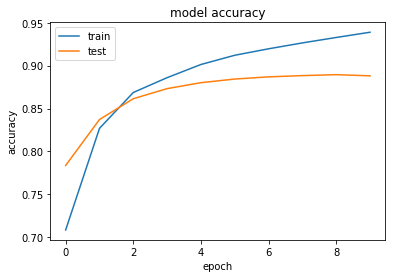

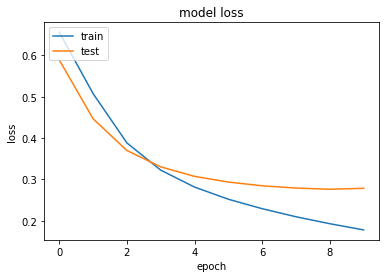

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### test model

In [20]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 140us/sample - loss: 0.2911 - acc: 0.8799


[0.2910514410686493, 0.87992]

### inference

UNK는 unknown 의미.

한 리뷰의 단어의 개수를 정해줘야함. 효과적 훈련을 위해 모든 데이터의 크기를 동일하게 하기 위함. 

리뷰에 쓰인 단어가 256개보다 크면 자르고, 256개보다 작으면 PAD 이용.



In [21]:
testID = 100
print(' '.join([idx2word[idx] for idx in x_test[testID]]))

out = model.predict(x_test[testID].reshape(1,256))
print(y_test[testID])
print(out)

<START> a quick glance at the premise of this film would seem to indicate just another dumb <UNK> <UNK> <UNK> slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread <UNK> tension amidst a lovely <UNK> backdrop these feelings are further <UNK> by a cast of realistically likable characters and <UNK> that are more amoral than cardboard <UNK> of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' <UNK> came from <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

In [22]:
x_test[100]

array([   1,    6, 1605, 7334,   33,    4,  863,    7,   14,   22,   62,
        306,    8, 7147,   43,  160,  995,    2,    2,    2, 8462, 3340,
          4,  552,  121,  383, 9538,  341,    5,    4,  156,   26,   32,
        616, 2118,   25,  165,  181,    8,  783,  190, 1545, 5779,   53,
         10,   10,  247,   74, 1152,   23, 3883, 2120,    5,  599,  151,
         50,    9,    6,  117,    7,  257,   57,  383,  190,    4,  509,
       2679,   23, 4498, 8153, 6249,    2, 1074, 6929,    6, 1334,    2,
       4157,  134, 1417,   26, 1037,    2,   34,    6,  177,    7, 7292,
       1451,  105,    5,    2,   15,   26,   53, 8955,   74, 3440,    2,
          7,  445,  449, 1243,  742, 4224,    9,  133,   99,    5,   54,
          9,   15,   24,    6,   52,  155,   10,   10,   48,   25,  423,
        355,  471,   95,  106,   14,    8,   67,  121,   76,    7, 9665,
          2,  385,   39,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   